#### 그림, 실습코드 등 학습자료 출처 : https://datascienceschool.net

#### # step1) 데이터 확인

In [80]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

- 'feature_names': ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']

In [81]:
iris.data[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

- 'target_names': 'setosa' = 0, 'versicolor'=1, 'virginica'=2

In [82]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

#### # step2) 원활한 데이터 가공을 위한 판다스 데이터 프레임 생성

In [83]:
df_d = pd.DataFrame(iris.data, columns=["sepal_length",'sepal_width','petal_length',\
                                     "petal_width"])

df_d.tail()

,sepal_length,sepal_width,petal_length,petal_width
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [84]:
df_t = pd.DataFrame(iris.target, columns = ["target"])

#### # step3) 'train data와 test data split'을 위한 'iris.data', 'iris.target' 병합

In [85]:
df = pd.concat([df_d, df_t], axis=1)

In [86]:
df.tail(5)

,sepal_length,sepal_width,petal_length,petal_width,target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


#### # step4) train data와 test data split

In [87]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=0)
len(train), len(test)

(120, 30)

#### # step5) x data와 y 데이터 분리

In [88]:
# train 데이터
x_train = train[["sepal_length","sepal_width","petal_length","petal_width"]]
y_train = train[["target"]]

In [89]:
# test 데이터
x_test = test[["sepal_length","sepal_width","petal_length","petal_width"]]
y_test = test[["target"]]

#### # step6) target value 원핫인코딩 조치

In [90]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train, 3)
y_test = np_utils.to_categorical(y_test, 3)
y_train[:5]

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

#### # step7) 모델생성

In [93]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

np.random.seed(0)

model = Sequential()
model.add(Dense(8, input_dim=4, activation="sigmoid"))
model.add(Dense(3, activation="sigmoid"))
model.compile(optimizer=SGD(lr=0.2), loss='mean_squared_error', metrics=["accuracy"])

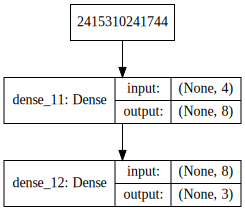

In [94]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [95]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 8)                 40        
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 27        
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


#### # step8) 모델성능확인

In [96]:
%%time
hist = model.fit(x_train, y_train,
                 epochs=200, batch_size=10,
                 validation_data=(x_test, y_test),
                 verbose=2)

Train on 120 samples, validate on 30 samples
Epoch 1/200
 - 0s - loss: 0.2487 - acc: 0.2250 - val_loss: 0.2402 - val_acc: 0.2000
Epoch 2/200
 - 0s - loss: 0.2322 - acc: 0.3500 - val_loss: 0.2337 - val_acc: 0.2000
Epoch 3/200
 - 0s - loss: 0.2250 - acc: 0.3667 - val_loss: 0.2295 - val_acc: 0.2000
Epoch 4/200
 - 0s - loss: 0.2206 - acc: 0.3667 - val_loss: 0.2281 - val_acc: 0.2000
Epoch 5/200
 - 0s - loss: 0.2177 - acc: 0.3667 - val_loss: 0.2264 - val_acc: 0.2000
Epoch 6/200
 - 0s - loss: 0.2146 - acc: 0.3750 - val_loss: 0.2247 - val_acc: 0.2000
Epoch 7/200
 - 0s - loss: 0.2119 - acc: 0.3917 - val_loss: 0.2209 - val_acc: 0.2000
Epoch 8/200
 - 0s - loss: 0.2087 - acc: 0.5083 - val_loss: 0.2180 - val_acc: 0.5000
Epoch 9/200
 - 0s - loss: 0.2056 - acc: 0.6667 - val_loss: 0.2141 - val_acc: 0.5667
Epoch 10/200
 - 0s - loss: 0.2024 - acc: 0.6917 - val_loss: 0.2112 - val_acc: 0.5667
Epoch 11/200
 - 0s - loss: 0.1988 - acc: 0.6917 - val_loss: 0.2073 - val_acc: 0.5667
Epoch 12/200
 - 0s - loss: 0.

Epoch 97/200
 - 0s - loss: 0.0800 - acc: 0.9417 - val_loss: 0.0832 - val_acc: 0.9333
Epoch 98/200
 - 0s - loss: 0.0803 - acc: 0.9417 - val_loss: 0.0875 - val_acc: 0.8667
Epoch 99/200
 - 0s - loss: 0.0782 - acc: 0.9250 - val_loss: 0.0795 - val_acc: 0.9667
Epoch 100/200
 - 0s - loss: 0.0784 - acc: 0.9417 - val_loss: 0.0793 - val_acc: 0.9333
Epoch 101/200
 - 0s - loss: 0.0770 - acc: 0.9583 - val_loss: 0.0825 - val_acc: 0.8667
Epoch 102/200
 - 0s - loss: 0.0772 - acc: 0.9667 - val_loss: 0.0854 - val_acc: 0.8667
Epoch 103/200
 - 0s - loss: 0.0775 - acc: 0.9333 - val_loss: 0.0772 - val_acc: 0.9667
Epoch 104/200
 - 0s - loss: 0.0753 - acc: 0.9417 - val_loss: 0.0786 - val_acc: 0.9333
Epoch 105/200
 - 0s - loss: 0.0750 - acc: 0.9417 - val_loss: 0.0786 - val_acc: 0.9333
Epoch 106/200
 - 0s - loss: 0.0740 - acc: 0.9417 - val_loss: 0.0756 - val_acc: 0.9667
Epoch 107/200
 - 0s - loss: 0.0737 - acc: 0.9500 - val_loss: 0.0736 - val_acc: 0.9667
Epoch 108/200
 - 0s - loss: 0.0728 - acc: 0.9500 - val_lo

Epoch 193/200
 - 0s - loss: 0.0391 - acc: 0.9667 - val_loss: 0.0320 - val_acc: 1.0000
Epoch 194/200
 - 0s - loss: 0.0386 - acc: 0.9667 - val_loss: 0.0387 - val_acc: 1.0000
Epoch 195/200
 - 0s - loss: 0.0395 - acc: 0.9583 - val_loss: 0.0336 - val_acc: 1.0000
Epoch 196/200
 - 0s - loss: 0.0396 - acc: 0.9667 - val_loss: 0.0324 - val_acc: 1.0000
Epoch 197/200
 - 0s - loss: 0.0390 - acc: 0.9500 - val_loss: 0.0355 - val_acc: 1.0000
Epoch 198/200
 - 0s - loss: 0.0383 - acc: 0.9583 - val_loss: 0.0347 - val_acc: 1.0000
Epoch 199/200
 - 0s - loss: 0.0387 - acc: 0.9583 - val_loss: 0.0283 - val_acc: 0.9667
Epoch 200/200
 - 0s - loss: 0.0383 - acc: 0.9667 - val_loss: 0.0284 - val_acc: 1.0000
Wall time: 2.23 s


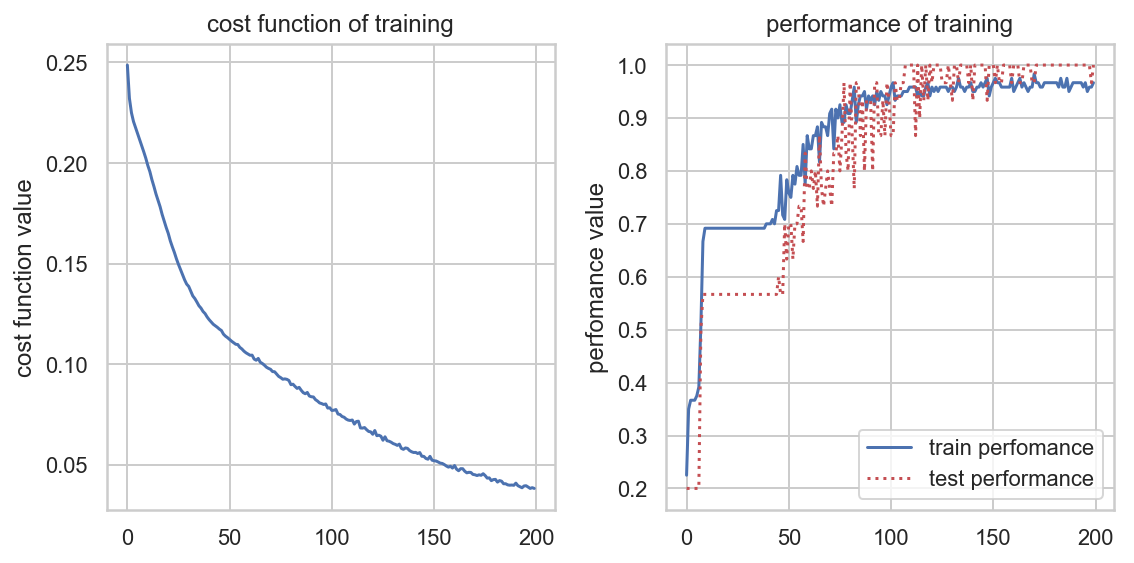

In [97]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'])
plt.title("cost function of training")
plt.ylabel("cost function value")
plt.subplot(1, 2, 2)
plt.title("performance of training")
plt.ylabel("perfomance value")
plt.plot(hist.history['acc'], 'b-', label="train perfomance")
plt.plot(hist.history['val_acc'], 'r:', label="test performance")
plt.legend()
plt.tight_layout()
plt.show()